# 6) Flagship Inflation — Diminishing Returns Beyond ₹60,000

This section explores how hardware value flattens in the premium smartphone segment.  
By comparing composite specification scores and value-per-rupee metrics across price brackets, the analysis demonstrates how incremental hardware gains become disproportionately expensive beyond ₹60k.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

DATA_PATH = "data/processed/all_brands_20k.csv"
FIG_DIR = "analysis/figures"
os.makedirs(FIG_DIR, exist_ok=True)

df = pd.read_csv(DATA_PATH)
df = df.dropna(subset=["price", "ram_gb", "storage_gb", "display_inch", "battery_mah", "camera_mp"])

---
## Composite Scoring Methodology

To evaluate overall smartphone value, a **composite specification score** is constructed to represent a device’s total hardware capability.  
Each key specification contributes to this score based on its relative importance to overall performance and user experience.

### Formula

$$
\text{Composite Score} =
(3 \times \text{RAM}_{GB}) +
\left(\frac{\text{Storage}_{GB}}{64}\right) +
\left(\frac{\text{Battery}_{mAh}}{1500}\right) +
\left(\frac{\text{Camera}_{MP}}{12}\right) +
(0.5 \times \text{Display Size}_{inches})
$$

The weights were assigned based on practical performance relevance:
- **RAM (×3):** Primary indicator of multitasking and smoothness.  
- **Storage (÷64):** Reflects capacity tiering, with diminishing returns beyond 256GB.  
- **Battery (÷1500):** Normalized to typical 4,500–6,000mAh smartphone ranges.  
- **Camera (÷12):** Adjusted for diminishing returns in megapixel scaling.  
- **Display (×0.5):** Minor influence; screen size variation offers marginal value beyond 6.5".

### Value-per-Rupee Metric

To translate the composite capability into a price-relative measure, the score is normalized by cost:

$$
\text{Value per ₹100,000} = 
\frac{\text{Composite Score}}{\text{Price}} \times 100,000
$$

This expresses how much technical capability a consumer receives per ₹100,000 spent.  
Higher values indicate **stronger specifications for the given price**, enabling brand and model-level comparison of true hardware value.

In [2]:
df["composite_score"] = (
    (3 * df["ram_gb"]) +
    (df["storage_gb"] / 64) +
    (df["battery_mah"] / 1500) +
    (df["camera_mp"] / 12) +
    (df["display_inch"] * 0.5)
)
df["value_per_100k"] = df["composite_score"] / df["price"] * 100000

In [3]:
bins = [20000, 30000, 40000, 60000, np.inf]
labels = ["₹20–30k", "₹30–40k", "₹40–60k", "₹60k+"]
df["price_segment"] = pd.cut(df["price"], bins=bins, labels=labels, right=False, include_lowest=True)

---
## Average Specification and Value Efficiency by Price Segment

The following table summarizes how average hardware capability (composite score) and value-per-rupee evolve as smartphones become more expensive.

In [4]:
segment_summary = (
    df.groupby("price_segment")[["composite_score", "value_per_100k"]]
    .mean()
    .round(2)
)
segment_summary

C:\Users\Admin\AppData\Local\Temp\ipykernel_8452\2368787399.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("price_segment")[["composite_score", "value_per_100k"]]


,composite_score,value_per_100k
price_segment,,
₹20–30k,38.56,164.42
₹30–40k,44.59,128.39
₹40–60k,48.14,101.71
₹60k+,55.30,61.59


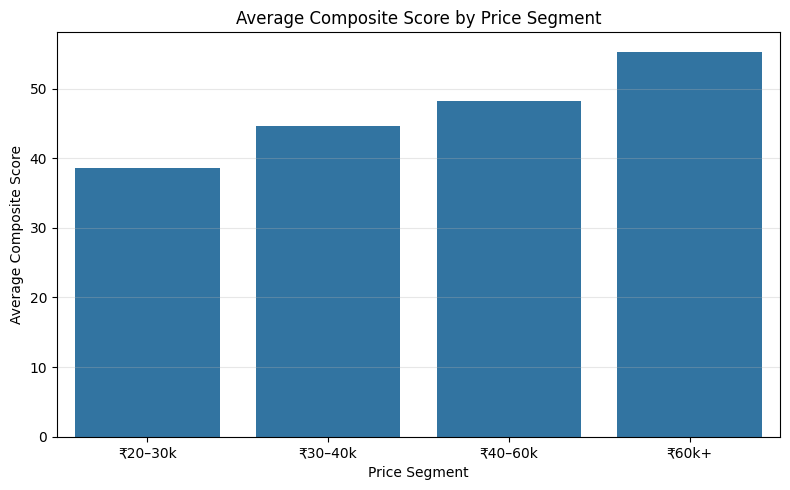

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=segment_summary.index,
    y=segment_summary["composite_score"],
    color="#1f77b4"
)
plt.title("Average Composite Score by Price Segment")
plt.xlabel("Price Segment")
plt.ylabel("Average Composite Score")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

fig_path_comp = os.path.join(FIG_DIR, "flagship_inflation_composite.png")
plt.savefig(fig_path_comp, dpi=200, bbox_inches="tight")
plt.show()

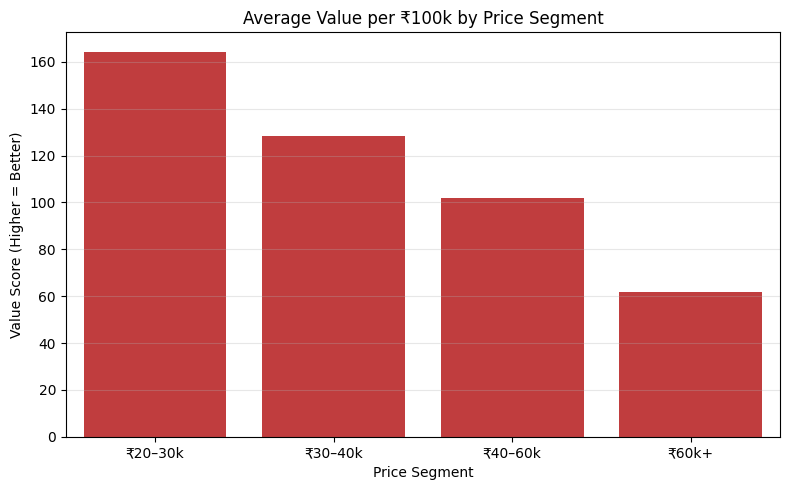

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=segment_summary.index,
    y=segment_summary["value_per_100k"],
    color="#d62728"
)
plt.title("Average Value per ₹100k by Price Segment")
plt.xlabel("Price Segment")
plt.ylabel("Value Score (Higher = Better)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

fig_path_val = os.path.join(FIG_DIR, "flagship_inflation_value.png")
plt.savefig(fig_path_val, dpi=200, bbox_inches="tight")
plt.show()

---
# Summary & Insights — Flagship Inflation: Diminishing Returns Beyond ₹60,000

### Overview
This analysis examines how smartphone value efficiency evolves across price segments, revealing the diminishing returns that occur once devices cross the ₹60,000 threshold — a phenomenon referred to as **Flagship Inflation**.  
While premium devices offer higher overall specifications, the increase in hardware capability does not scale proportionally with price, leading to reduced spec-per-rupee efficiency.

### Key Observations

| Price Segment | Avg. Composite Score | Avg. Value/₹100k | Trend |
|----------------|----------------------|------------------|--------|
| ₹20–30k | 38.56 | **164.42** | Highest value efficiency — the “sweet spot” of the market. |
| ₹30–40k | 44.59 | 128.39 | Moderate gains in specs, but value drops sharply. |
| ₹40–60k | 48.14 | 101.71 | Further decline in efficiency; rising prices outpace hardware growth. |
| ₹60k+ | 55.30 | **61.59** | Steepest drop — high brand premium, minimal relative spec gain. |

- Composite score rises from **38.6 → 55.3** (+43%) across segments,  
  but **price escalation outpaces spec improvement**, causing value-per-₹100k to plunge **from 164 → 61** (–63%).  
- The **₹20–30k segment** remains the most efficient, delivering flagship-level configurations at one-third the cost of ultra-premium devices.  
- The **₹60k+ segment** shows the strongest “inflation effect” — incremental spec upgrades priced at disproportionately higher rates.  

### Interpretation
- **Diminishing Returns:** Beyond ₹40k, additional expenditure yields minimal improvement in composite capability — the price curve rises faster than the performance curve.  
- **Flagship Premiums:** The steep drop in value-per-₹100k reflects **intangible price drivers** such as brand prestige, camera software optimization, display calibration, and ecosystem integration.  
- **Performance Plateau:** Hardware parity across midrange and flagship devices means real differentiation now depends on user experience, design, and brand ecosystem rather than raw specifications.

### Implications
- **For Consumers:** The optimal price-performance window lies between **₹25k–₹35k**, where devices maximize hardware capability per rupee spent.  
  Spending beyond ₹60k typically pays for refinements, not proportional technical gains.  
- **For Analysts:** The quantified value decline from **164 → 62** validates the market’s “flagship inflation” curve — premium pricing without commensurate spec growth.  
- **For Brands:** Ultra-premium models rely heavily on brand trust, ecosystem stickiness, and aspirational marketing rather than hardware superiority alone.  
  Midrange leaders like **Realme** and **Xiaomi** exploit this gap to capture price-sensitive volume share.

### Conclusion
The data confirms a clear market ceiling for hardware value efficiency in India’s 5G smartphone segment.  
Flagship devices continue to evolve technologically, but their improvements yield **diminishing tangible returns**.  
True innovation leadership now hinges less on specifications and more on **experience, ecosystem, and efficiency**.

---